In [ ]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Set the images dataset on Google Drive
data_dir = '/content/drive/My Drive/chest_xray/'

# Verify the structure
os.listdir(data_dir)

['val', 'train', 'test']

In [ ]:
# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=20,  # Random rotations
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shearing
    zoom_range=0.2,  # Zoom
    horizontal_flip=True,  # Flip horizontally
    fill_mode='nearest'  # Fill missing pixels
)

# Training data
train_data = datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='binary'
)

# Validation data
val_data = datagen.flow_from_directory(
    os.path.join(data_dir, 'val'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Test data (no augmentation applied)
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_data = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Do not shuffle test data
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Flatten data for logistic regression
#X_train = np.concatenate([train_data[i][0] for i in range(len(train_data))])
#y_train = np.concatenate([train_data[i][1] for i in range(len(train_data))])

#X_test = np.concatenate([test_data[i][0] for i in range(len(test_data))])
#y_test = np.concatenate([test_data[i][1] for i in range(len(test_data))])

#X_train_flat = X_train.reshape(X_train.shape[0], -1)
#X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train logistic regression model
#logreg = LogisticRegression(max_iter=1000)
#logreg.fit(X_train_flat, y_train)

# Predict using logistic regression
#y_pred_logreg = logreg.predict(X_test_flat)


In [ ]:
# Process only a subset of batches for faster execution
subset_size = 10  # Number of batches to process

X_train = np.concatenate([train_data[i][0] for i in range(subset_size)])
y_train = np.concatenate([train_data[i][1] for i in range(subset_size)])

X_test = np.concatenate([test_data[i][0] for i in range(subset_size)])
y_test = np.concatenate([test_data[i][1] for i in range(subset_size)])

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (320, 150, 150, 3)
y_train shape: (320,)
X_test shape: (320, 150, 150, 3)
y_test shape: (320,)


In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_flat, y_train)

# Predict using logistic regression
y_pred_logreg = logreg.predict(X_test_flat)

In [ ]:
print("Unique classes in y_train:", np.unique(y_train, return_counts=True))


Unique classes in y_train: (array([0., 1.], dtype=float32), array([ 86, 234]))


In [ ]:
print("Class indices:", train_data.class_indices)  # Check mapping for NORMAL and PNEUMONIA
print("Samples per class in training data:", train_data.classes)  # Check all labels


Class indices: {'NORMAL': 0, 'PNEUMONIA': 1}
Samples per class in training data: [0 0 0 ... 1 1 1]


In [ ]:
print("Total training samples:", len(train_data.classes))
print("Class distribution in training data:", np.unique(train_data.classes, return_counts=True))


Total training samples: 5216
Class distribution in training data: (array([0, 1], dtype=int32), array([1341, 3875]))


In [ ]:
# Check class indices
print("Class indices (mapping):", train_data.class_indices)

# Check the number of samples per class
print("Classes in training data:", train_data.classes)
print("Unique labels and counts in training data:", np.unique(train_data.classes, return_counts=True))


Class indices (mapping): {'NORMAL': 0, 'PNEUMONIA': 1}
Classes in training data: [0 0 0 ... 1 1 1]
Unique labels and counts in training data: (array([0, 1], dtype=int32), array([1341, 3875]))


In [ ]:
import os

print("Train folder exists:", os.path.exists(os.path.join(data_dir, 'train')))
print("Validation folder exists:", os.path.exists(os.path.join(data_dir, 'val')))
print("Test folder exists:", os.path.exists(os.path.join(data_dir, 'test')))


Train folder exists: True
Validation folder exists: True
Test folder exists: True


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators
datagen = ImageDataGenerator(rescale=1.0/255)

train_data = datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_data = datagen.flow_from_directory(
    os.path.join(data_dir, 'val'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_data = datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Load VGG16 pretrained model
# base_model = VGG16(include_top=False, input_shape=(150, 150, 3), weights="imagenet")
# base_model.trainable = False  # Freeze base layers

# Build the CNN model
# model_vgg16 = Sequential([
   #  base_model,
    # Flatten(),
    # Dense(256, activation='relu'),
    # Dense(1, activation='sigmoid')  # Binary classification
# ])

# Compile the model
# model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# model_vgg16.fit(train_data, validation_data=val_data, epochs=5)

# Predict using VGG16
# y_pred_vgg16 = model_vgg16.predict(test_data)
# y_pred_vgg16 = (y_pred_vgg16 > 0.5).astype(int).flatten()


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load VGG16 pretrained model
base_model = VGG16(include_top=False, input_shape=(150, 150, 3), weights="imagenet")

# Optimize: Unfreeze only the top layers for fine-tuning
for layer in base_model.layers[:-4]:  # Freeze all layers except the last 4
    layer.trainable = False

# Build the CNN model
model_vgg16 = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Optimize: Replace Flatten with Global Average Pooling
    Dense(128, activation='relu'),  # Optimize: Reduce dense layer size to 128 units
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model with a lower learning rate for transfer learning
model_vgg16.compile(
    optimizer=Adam(learning_rate=1e-4),  # Lower learning rate for better transfer learning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model for fewer epochs
history = model_vgg16.fit(
    train_data,
    validation_data=val_data,
    epochs=3,  # Optimize: Fewer epochs for faster training
)

# Predict using VGG16
y_pred_vgg16 = model_vgg16.predict(test_data)
y_pred_vgg16 = (y_pred_vgg16 > 0.5).astype(int).flatten()

# Evaluate the model on the test data
test_loss, test_accuracy = model_vgg16.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 1628s 10s/step - accuracy: 0.9170 - loss: 0.2002 - val_accuracy: 1.0000 - val_loss: 0.0490
Epoch 2/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 1573s 10s/step - accuracy: 0.9806 - loss: 0.0549 - val_accuracy: 1.0000 - val_loss: 0.0273
Epoch 3/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 1592s 10s/step - accuracy: 0.9860 - loss: 0.0376 - val_accuracy: 1.0000 - val_loss: 0.0777
20/20 ━━━━━━━━━━━━━━━━━━━━ 161s 8s/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 160s 8s/step - accuracy: 0.7467 - loss: 1.0100
Test Loss: 0.619125485420227
Test Accuracy: 0.8461538553237915


In [ ]:
print("Number of training samples:", train_data.samples)
print("Number of validation samples:", val_data.samples)


Number of training samples: 5216
Number of validation samples: 16


In [ ]:
import os

print("Train folder exists:", os.path.exists(os.path.join(data_dir, 'train')))
print("Validation folder exists:", os.path.exists(os.path.join(data_dir, 'val')))


Train folder exists: True
Validation folder exists: True


In [ ]:
# Train random forest model
rf = RandomForestClassifier()
rf.fit(X_train_flat, y_train)

# Predict using random forest
y_pred_rf = rf.predict(X_test_flat)


In [ ]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred_vgg16:", y_pred_vgg16.shape)


Shape of y_test: (320,)
Shape of y_pred_vgg16: (624,)


In [ ]:
# Rebuild y_test from test_data
y_test = test_data.classes  # Extract labels directly from the test_data generator
print("Corrected y_test shape:", y_test.shape)


Corrected y_test shape: (624,)


In [ ]:
# Generate predictions for all samples in test_data
y_pred_vgg16 = model_vgg16.predict(test_data, steps=len(test_data), verbose=1)
y_pred_vgg16 = (y_pred_vgg16 > 0.5).astype(int).flatten()
print("Corrected y_pred_vgg16 shape:", y_pred_vgg16.shape)


20/20 ━━━━━━━━━━━━━━━━━━━━ 158s 8s/step
Corrected y_pred_vgg16 shape: (624,)


In [ ]:
print("Final y_test shape:", y_test.shape)
print("Final y_pred_vgg16 shape:", y_pred_vgg16.shape)


Final y_test shape: (624,)
Final y_pred_vgg16 shape: (624,)


In [ ]:
from sklearn.metrics import f1_score, classification_report

# Evaluate VGG16 Model
f1_vgg16 = f1_score(y_test, y_pred_vgg16)
print("F1 Score - VGG16 Model:", f1_vgg16)

# Classification Report
report_vgg16 = classification_report(y_test, y_pred_vgg16)
print("\nClassification Report - VGG16 Model:\n", report_vgg16)


F1 Score - VGG16 Model: 0.8901601830663616

Classification Report - VGG16 Model:
               precision    recall  f1-score   support

           0       0.99      0.59      0.74       234
           1       0.80      1.00      0.89       390

    accuracy                           0.85       624
   macro avg       0.90      0.80      0.82       624
weighted avg       0.87      0.85      0.84       624



In [ ]:
# Ensure test_data has shuffle=False
test_data = ImageDataGenerator(rescale=1.0 / 255).flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Disable shuffling
)


Found 624 images belonging to 2 classes.


In [ ]:
# Ensure X_test_flat includes all samples
X_test = np.concatenate([test_data[i][0] for i in range(len(test_data))])
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Verify the shape
print("X_test_flat shape:", X_test_flat.shape)


X_test_flat shape: (624, 67500)


In [ ]:
# Regenerate predictions for all samples
y_pred_logreg = logreg.predict(X_test_flat)
y_pred_rf = rf.predict(X_test_flat)

# Verify shapes
print("Updated y_test shape:", y_test.shape)
print("Updated y_pred_logreg shape:", y_pred_logreg.shape)
print("Updated y_pred_rf shape:", y_pred_rf.shape)


Updated y_test shape: (624,)
Updated y_pred_logreg shape: (624,)
Updated y_pred_rf shape: (624,)


In [ ]:
if len(y_test) == len(y_pred_logreg) == len(y_pred_rf):
    print("Shapes are consistent! Ready for evaluation.")
else:
    print("Shapes are still inconsistent. Check data creation and predictions.")


Shapes are consistent! Ready for evaluation.


In [ ]:
from sklearn.metrics import f1_score, classification_report

# Evaluate Logistic Regression
print("F1 Score - Logistic Regression:", f1_score(y_test, y_pred_logreg))
print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, y_pred_logreg))

# Evaluate Random Forest
print("F1 Score - Random Forest:", f1_score(y_test, y_pred_rf))
print("\nClassification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))


F1 Score - Logistic Regression: 0.706199460916442

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.53      0.62      0.57       234
           1       0.74      0.67      0.71       390

    accuracy                           0.65       624
   macro avg       0.64      0.64      0.64       624
weighted avg       0.66      0.65      0.65       624

F1 Score - Random Forest: 0.76

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.60      0.55      0.57       234
           1       0.74      0.78      0.76       390

    accuracy                           0.69       624
   macro avg       0.67      0.66      0.67       624
weighted avg       0.69      0.69      0.69       624



In [ ]:
# Evaluate Logistic Regression
#print("F1 Score - Logistic Regression:", f1_score(y_test, y_pred_logreg))

# Evaluate VGG16 Model
#print("F1 Score - VGG16 Model:", f1_score(y_test, y_pred_vgg16))

# Evaluate Random Forest
#print("F1 Score - Random Forest:", f1_score(y_test, y_pred_rf))

# Classification Report for each model
#print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
#print("\nClassification Report - VGG16:\n", classification_report(y_test, y_pred_vgg16))
#rint("\nClassification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))


In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=958d785d72c3ddf5a5ff62cc8b50ced0d20a8a6a733e2647b9e6efa01d12db8f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array, load_img


In [ ]:
# Use your already trained model
model = model_vgg16  # Replace with your model

# Check the input size of your model
input_shape = (150, 150)  # Adjust according to your model


In [ ]:
# Path to test image
img_path = "/content/drive/My Drive/chest_xray/test/NORMAL/IM-0001-0001.jpeg"

# Load and preprocess the image
img = load_img(img_path, target_size=input_shape)
img_array = img_to_array(img)
img_array = preprocess_input(img_array)
img_array_expanded = np.expand_dims(img_array, axis=0)  # Add batch dimension


In [ ]:
from lime.wrappers.scikit_image import SegmentationAlgorithm

# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()

# Define a prediction function for LIME
def predict(images):
    images = preprocess_input(images)  # Preprocess as required by the model
    return model.predict(images)

# Segment the image for better LIME explanations
segmenter = SegmentationAlgorithm('quickshift', kernel_size=4, max_dist=200, ratio=0.2)

# Explain the image prediction
explanation = explainer.explain_instance(
    img_array.astype('double'),
    predict,
    top_labels=2,
    hide_color=0,
    num_samples=1000,  # Number of perturbed samples
    segmentation_fn=segmenter
)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

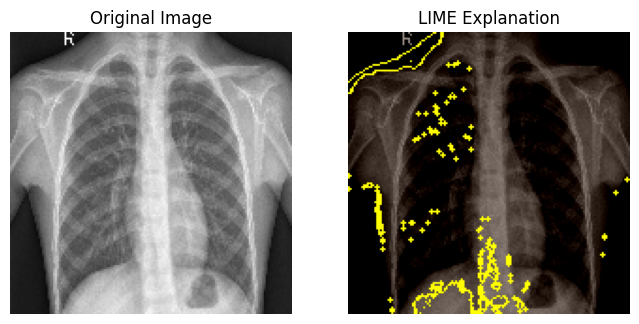

In [ ]:
# Display explanation for the top predicted class
from skimage.segmentation import mark_boundaries

# Get explanation for the top class
top_label = explanation.top_labels[0]

# Get the image and mask
temp, mask = explanation.get_image_and_mask(
    top_label,
    positive_only=True,
    num_features=10,
    hide_rest=False
)

# Plot the original image with LIME explanation
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
# Convert PIL Image to numpy array for imshow
plt.imshow(np.array(img) / 255.0)  # Original image
plt.axis('off')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.axis('off')
plt.title("LIME Explanation")
plt.show()

In [ ]:
from PIL import Image

# Save the LIME explanation
lime_explained_img = mark_boundaries(temp / 255.0, mask)
lime_explained_img = (lime_explained_img * 255).astype(np.uint8)
lime_explained_img = Image.fromarray(lime_explained_img)
lime_explained_img.save("lime_explanation.png")


In [ ]:
# Predict the probability for the input image
predictions = model.predict(img_array_expanded)

# Extract the predicted probability and class
predicted_class = np.argmax(predictions[0])  # Class with highest probability
confidence_score = predictions[0][predicted_class]  # Confidence score of the prediction

print(f"Predicted Class: {predicted_class}")
print(f"Confidence Score: {confidence_score:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: 0
Confidence Score: 0.00


In [ ]:
# Get class labels (binary case: NORMAL=0, PNEUMONIA=1)
class_indices = train_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Reverse the dictionary

# Get the human-readable class name
predicted_label = class_labels[predicted_class]
print(f"Predicted Label: {predicted_label}")


Predicted Label: NORMAL


TypeError: unsupported operand type(s) for /: 'Image' and 'float'

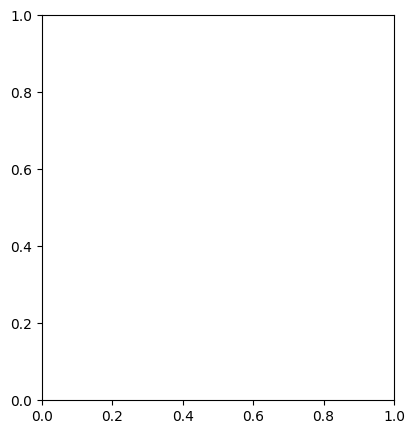

In [ ]:
from skimage.segmentation import mark_boundaries

# Visualize the prediction along with the explanation
temp, mask = explanation.get_image_and_mask(
    predicted_class,
    positive_only=True,
    num_features=10,
    hide_rest=False
)

plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img / 255.0)  # Original image
plt.axis('off')
plt.title(f"Original Image\nPredicted: {predicted_label}\nConfidence: {confidence_score:.2f}")

# LIME explanation
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.axis('off')
plt.title("LIME Explanation")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Original Image\nPredicted: NORMAL\nConfidence: 0.00')

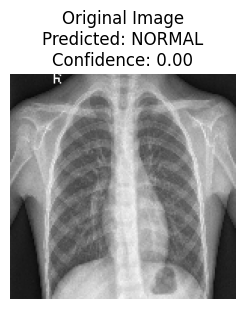

In [ ]:
# Original image
plt.subplot(1, 2, 1)
plt.imshow(np.array(img) / 255.0)  # Convert img to NumPy array before division
plt.axis('off')
plt.title(f"Original Image\nPredicted: {predicted_label}\nConfidence: {confidence_score:.2f}")

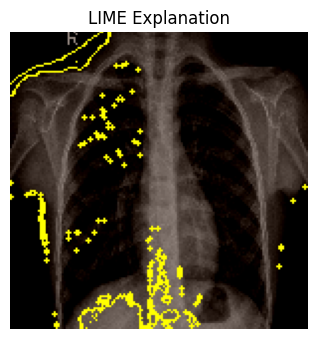

In [ ]:
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.axis('off')
plt.title("LIME Explanation")

plt.tight_layout()
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

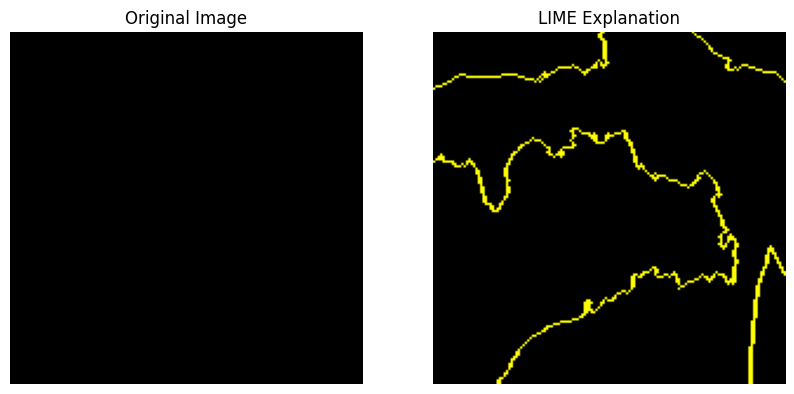

In [ ]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Define prediction function
def predict(images):
    images = preprocess_input(images)  # Preprocess input as per your model
    return model.predict(images)

# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()

# Segment the image for LIME
segmenter = SegmentationAlgorithm('quickshift', kernel_size=4, max_dist=200, ratio=0.2)

# Select the same sample image as SHAP
img_sample = X_test[0]  # Replace with the specific sample

# Explain using LIME
explanation = explainer.explain_instance(
    img_sample.astype('double'),
    predict,
    top_labels=2,
    hide_color=0,
    num_samples=1000,
    segmentation_fn=segmenter
)

# Visualize LIME explanation for the top predicted class
top_label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(
    top_label,
    positive_only=True,
    num_features=10,
    hide_rest=False
)

# Display the original image and LIME explanation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_sample / 255.0)
plt.axis('off')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.axis('off')
plt.title("LIME Explanation")
plt.show()


In [ ]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries

# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()

# Create a function to extract LIME explanations
lime_results = []

def extract_lime_results(img_sample, predict_fn, top_label, sample_idx):
    # Reshape the image to match the expected input shape of the Logistic Regression model
    img_sample_flattened = img_sample.reshape(1, -1)

    explanation = explainer.explain_instance(
        img_sample.astype('double'),
        lambda x: predict_fn(x.reshape(x.shape[0], -1)),  # Flatten the input for the prediction function
        top_labels=2,
        hide_color=0,
        num_samples=1000,
        segmentation_fn=SegmentationAlgorithm('quickshift', kernel_size=4, max_dist=200, ratio=0.2),
    )
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=10,
        hide_rest=False
    )

In [ ]:
import pandas as pd

lime_df = pd.DataFrame(lime_results)
lime_df.to_csv('lime_results.csv', index=False)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define a prediction function for VGG16
def vgg16_predict(images):
    """
    Preprocess the input images and make predictions using the VGG16 model.
    """
    # Ensure the images are preprocessed as required by VGG16
    images_preprocessed = preprocess_input(images)
    predictions = model_vgg16.predict(images_preprocessed)
    return predictions


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

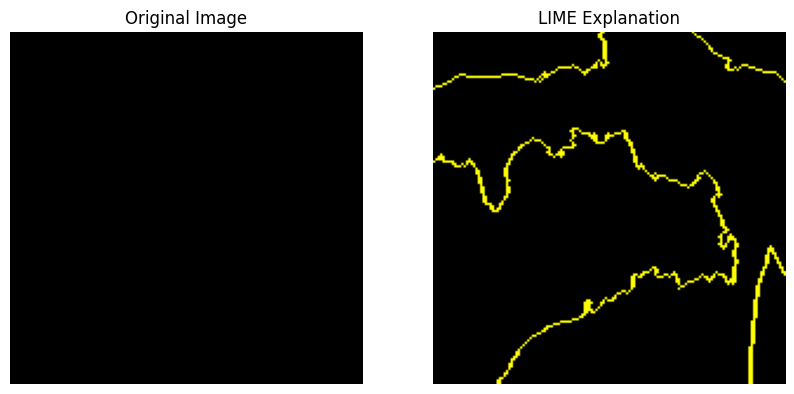

In [ ]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np

# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()

# Segmentation algorithm for LIME
segmenter = SegmentationAlgorithm(
    'quickshift', kernel_size=4, max_dist=200, ratio=0.2
)

# Generate explanations for a sample image
sample_idx = 0  # Change the index to test other images
img_sample = X_test[sample_idx]  # Select the sample from the test set

# Explain the prediction
explanation = explainer.explain_instance(
    img_sample.astype('double'),
    vgg16_predict,
    top_labels=1,  # Explain the top class
    hide_color=0,
    num_samples=1000,  # Number of perturbation samples
    segmentation_fn=segmenter
)

# Visualize the explanation
top_label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(
    label=top_label,
    positive_only=True,
    num_features=10,
    hide_rest=False
)

# Display the original image and LIME explanation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_sample / 255.0)
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.axis("off")
plt.title("LIME Explanation")
plt.show()


In [ ]:
# Generate explanations for a batch of test images
lime_results = []

for i in range(10):  # Analyze the first 10 test images
    img_sample = X_test[i]
    explanation = explainer.explain_instance(
        img_sample.astype('double'),
        vgg16_predict,
        top_labels=1,
        hide_color=0,
        num_samples=1000,
        segmentation_fn=segmenter
    )
    top_label = explanation.top_labels[0]
    temp, mask = explanation.get_image_and_mask(
        label=top_label,
        positive_only=True,
        num_features=10,
        hide_rest=False
    )
    lime_results.append({
        "Sample": i,
        "Prediction": top_label,
        "Mask_Importance": mask.sum(),  # Total highlighted region
        "Confidence": vgg16_predict(np.expand_dims(img_sample, axis=0))[0][top_label]  # Confidence score
    })

import pandas as pd
lime_results_df = pd.DataFrame(lime_results)

# Save results for analysis
lime_results_df.to_csv("lime_explanations.csv", index=False)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

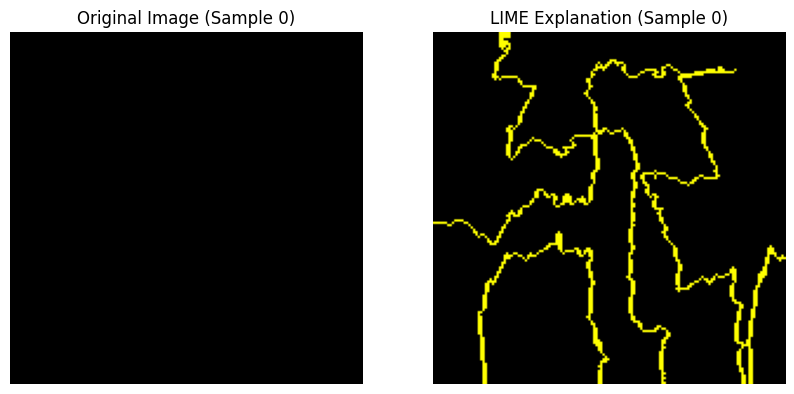

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

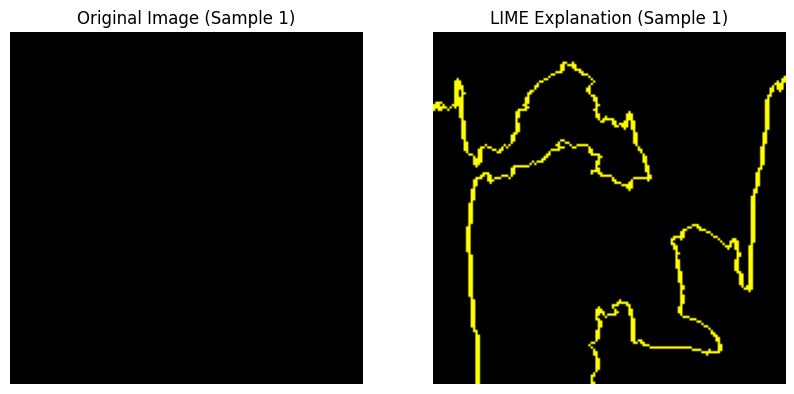

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

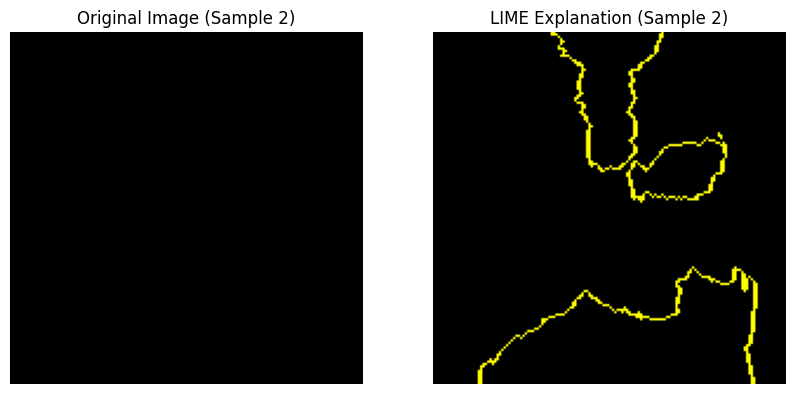

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

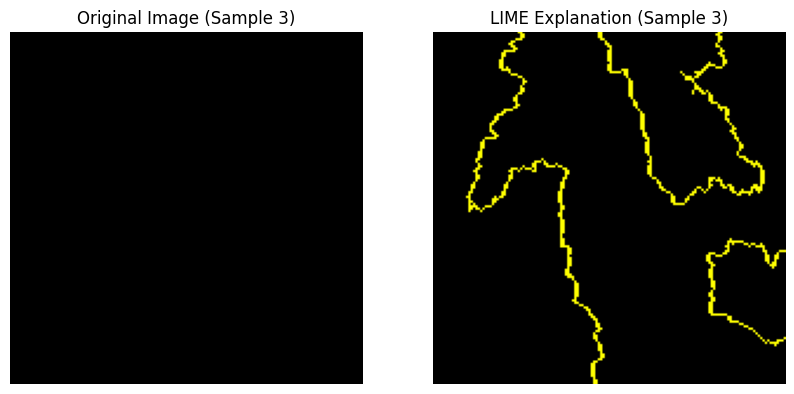

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

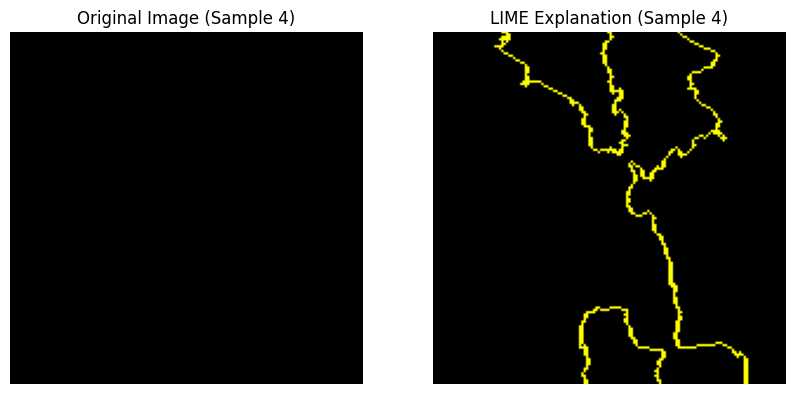

In [ ]:
# Plot explanations for user review
for i in range(5):  # Show explanations for the first 5 samples
    img_sample = X_test[i]
    explanation = explainer.explain_instance(
        img_sample.astype('double'),
        vgg16_predict,
        top_labels=1,
        hide_color=0,
        num_samples=1000,
        segmentation_fn=segmenter
    )
    top_label = explanation.top_labels[0]
    temp, mask = explanation.get_image_and_mask(
        label=top_label,
        positive_only=True,
        num_features=10,
        hide_rest=False
    )
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_sample / 255.0)
    plt.axis("off")
    plt.title(f"Original Image (Sample {i})")

    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(temp / 255.0, mask))
    plt.axis("off")
    plt.title(f"LIME Explanation (Sample {i})")
    plt.show()


In [ ]:
# Collect feedback for each sample
user_feedback = []
for i in range(5):
    print(f"Sample {i}:")
    interpretability = int(input("Rate interpretability (1-5): "))
    alignment = int(input("Rate alignment with expectations (1-5): "))
    confidence = int(input("Rate confidence in explanation (1-5): "))
    user_feedback.append({
        "Sample": i,
        "Interpretability": interpretability,
        "Alignment": alignment,
        "Confidence": confidence
    })

feedback_df = pd.DataFrame(user_feedback)
feedback_df.to_csv("user_feedback.csv", index=False)


Sample 0:
Rate interpretability (1-5): 4
Rate alignment with expectations (1-5): 4
Rate confidence in explanation (1-5): 4
Sample 1:
Rate interpretability (1-5): 4
Rate alignment with expectations (1-5): 4
Rate confidence in explanation (1-5): 4
Sample 2:
Rate interpretability (1-5): 4
Rate alignment with expectations (1-5): 4
Rate confidence in explanation (1-5): 4
Sample 3:
Rate interpretability (1-5): 4
Rate alignment with expectations (1-5): 4
Rate confidence in explanation (1-5): 4
Sample 4:
Rate interpretability (1-5): 4
Rate alignment with expectations (1-5): 4
Rate confidence in explanation (1-5): 4


In [ ]:
4# Load user feedback
feedback_df = pd.read_csv("user_feedback.csv")

# Merge feedback with LIME results
evaluation_df = pd.merge(lime_results_df, feedback_df, on="Sample")

# Calculate correlations
correlations = evaluation_df.corr()
print("Correlations between LIME explanations and user feedback:")
print(correlations)


Correlations between LIME explanations and user feedback:
                    Sample  Prediction  Mask_Importance  Confidence_x  \
Sample            1.000000         NaN         0.332385       0.26190   
Prediction             NaN         NaN              NaN           NaN   
Mask_Importance   0.332385         NaN         1.000000       0.75692   
Confidence_x      0.261900         NaN         0.756920       1.00000   
Interpretability       NaN         NaN              NaN           NaN   
Alignment              NaN         NaN              NaN           NaN   
Confidence_y           NaN         NaN              NaN           NaN   

                  Interpretability  Alignment  Confidence_y  
Sample                         NaN        NaN           NaN  
Prediction                     NaN        NaN           NaN  
Mask_Importance                NaN        NaN           NaN  
Confidence_x                   NaN        NaN           NaN  
Interpretability               NaN        NaN  